<a href="https://colab.research.google.com/github/devpatel0005/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's an explanation of each feature:

*   **Pregnancies**: This column represents the number of times a woman has been pregnant.
*   **Glucose**: This indicates the plasma glucose concentration a 2 hours in an oral glucose tolerance test. Higher values often suggest diabetes.
*   **BloodPressure**: Diastolic blood pressure (mm Hg). This is an important indicator of cardiovascular health.
*   **SkinThickness**: Triceps skin fold thickness (mm). This is used to estimate body fat.
*   **Insulin**: 2-Hour serum insulin (mu U/ml). Insulin levels are crucial for glucose regulation.
*   **BMI**: Body mass index (weight in kg/(height in m)^2). A common measure of whether a person is a healthy weight.
*   **DiabetesPedigreeFunction**: This function provides a synthesis of the diabetes history in relatives and the genetic relationship of those relatives to the patient. A higher value indicates a greater genetic predisposition to diabetes.
*   **Age**: Age in years. Age is a known risk factor for diabetes.
*   **Outcome**: This is the target variable, indicating whether the patient has diabetes (1) or not (0).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/Diabetes-Prediction/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#here we can see that BMI,Blood Pressure,Skin Thickness,glucose, insulin min value is 0 which is not possible so we will impute with median

In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [10]:
lst=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
  df[i]=df[i].replace(0,df[i].median())

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.drop_duplicates(inplace=True)

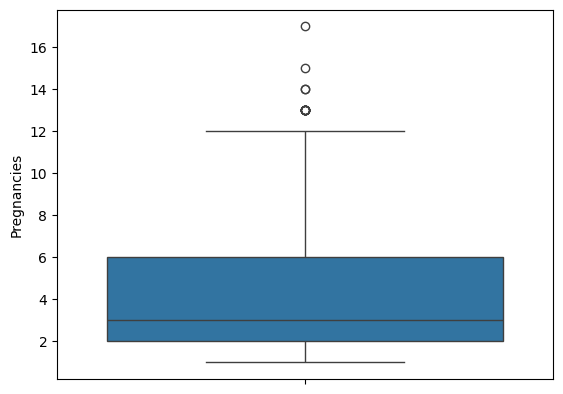

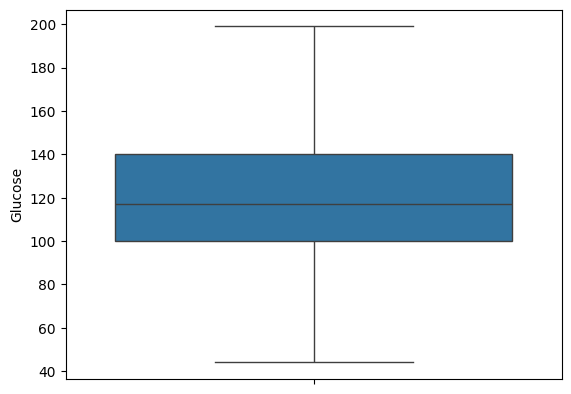

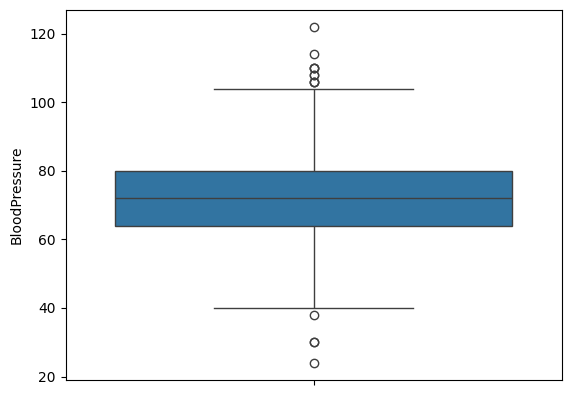

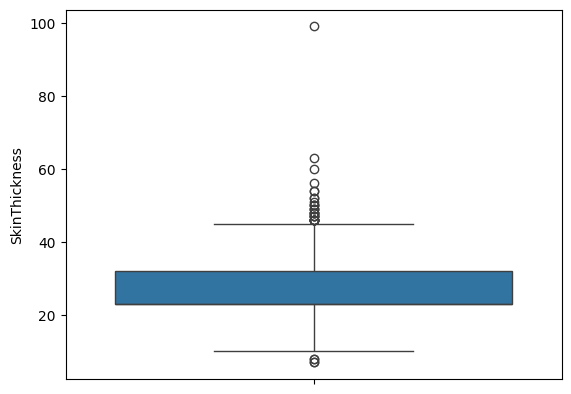

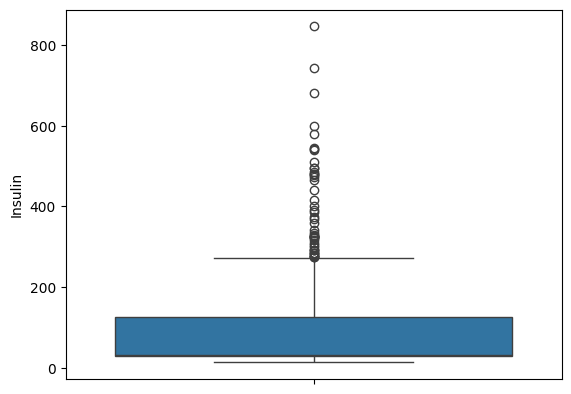

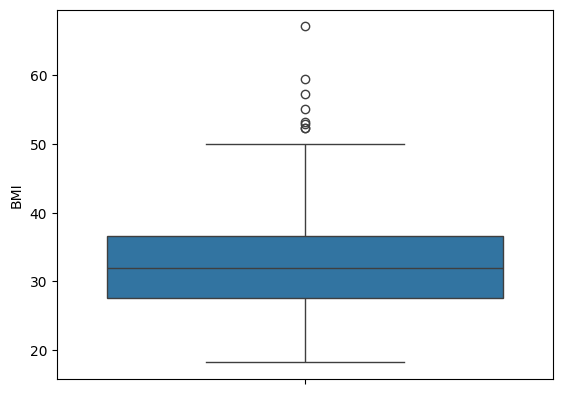

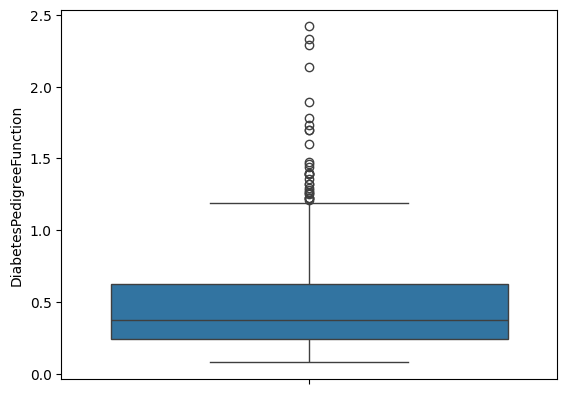

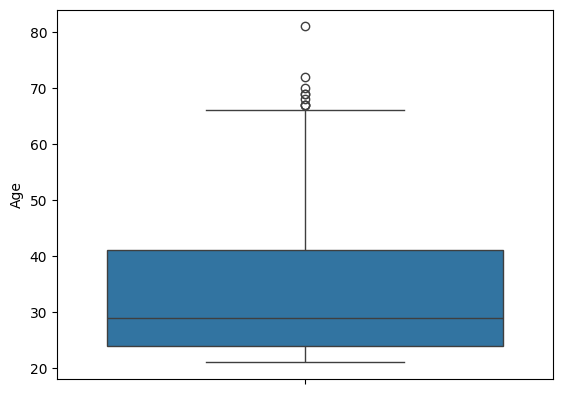

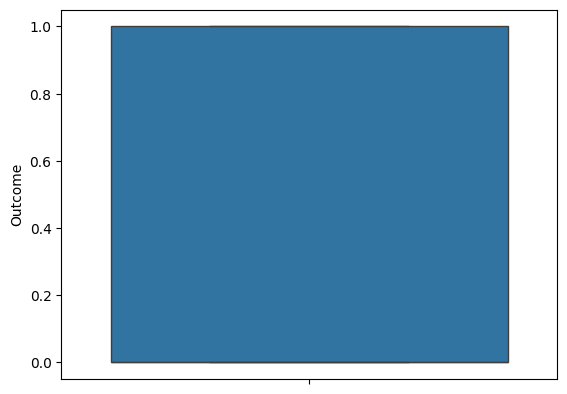

In [13]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [14]:
#here there are too many outliers so mananging them is very important step

In [15]:

def manage_out(df,cols):
  for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df[i]=np.where(df[i]>upper, df[i].median(), df[i])
    df[i]=np.where(df[i]<lower, df[i].median(), df[i])

  return df

df=manage_out(df,['Pregnancies'	,'BloodPressure'	,'SkinThickness'	,'Insulin'	,'BMI'	,'DiabetesPedigreeFunction'	,'Age'])


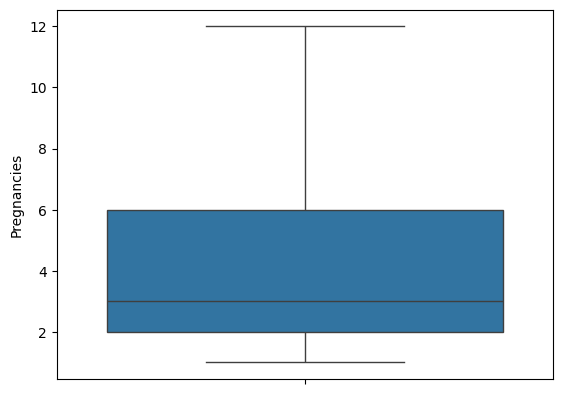

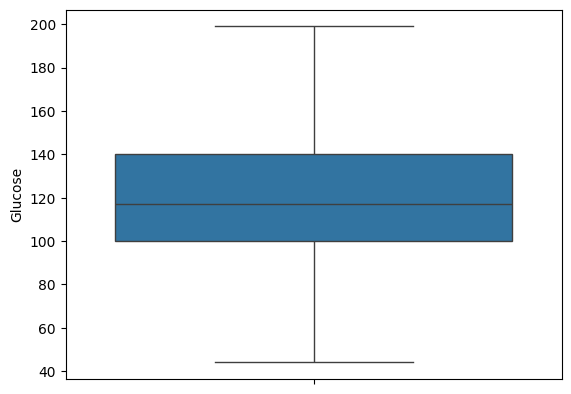

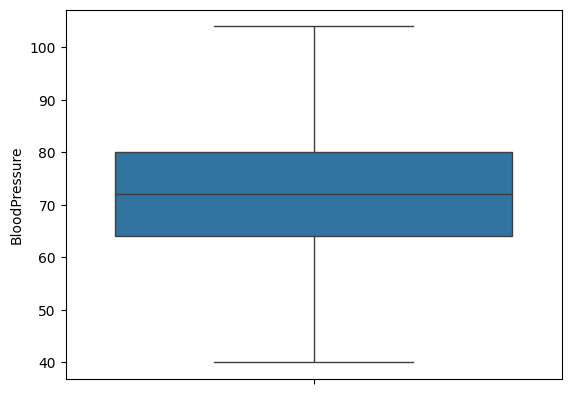

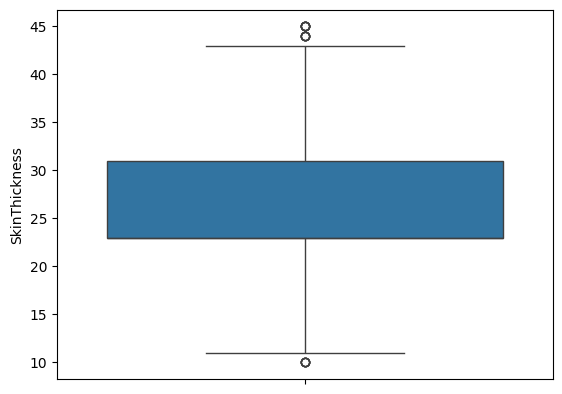

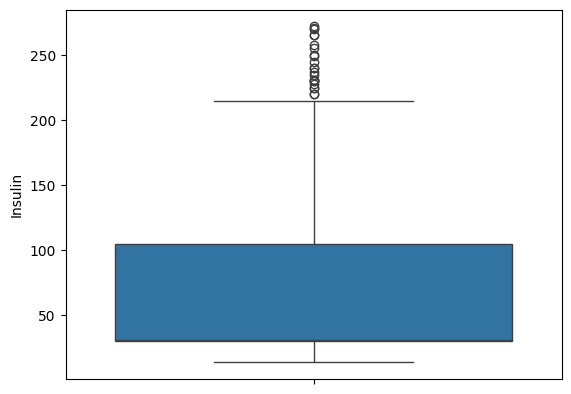

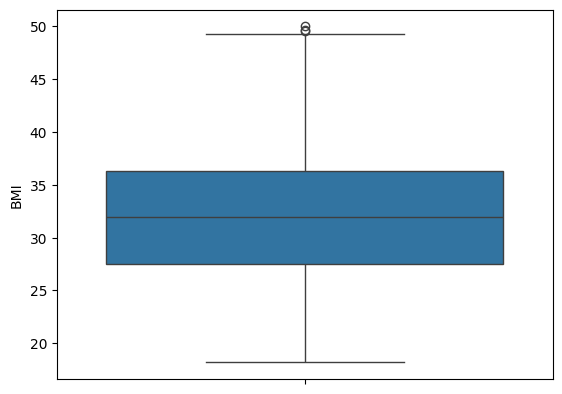

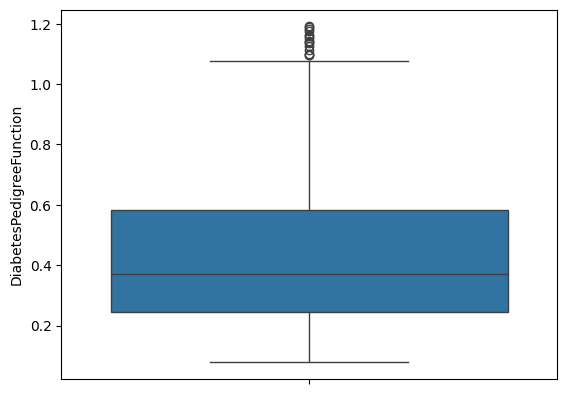

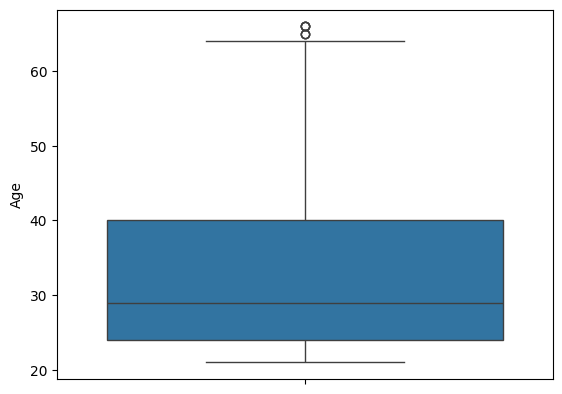

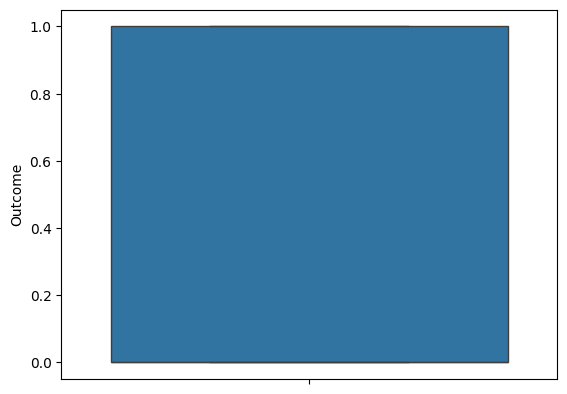

In [16]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [17]:
for i in df.columns:
  if (df[i].skew() > 0.75) or (df[i].skew() < -0.75):
    print(i," ",df[i].skew())

Pregnancies   0.9509629126872521
Insulin   1.387087002335226
DiabetesPedigreeFunction   0.9561857403348542
Age   1.0393283893339338


In [18]:
for i in ['Insulin','DiabetesPedigreeFunction']:
  df[i]=np.log1p(df[i])

<Axes: >

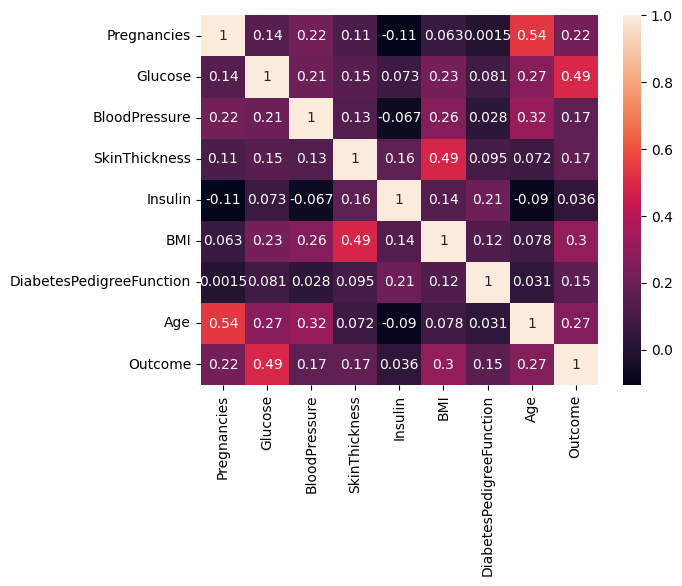

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
#there is not much to do in this correlation since there is no multi colinearity

In [21]:
#now we will resample the data
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(df.drop('Outcome',axis=1),df['Outcome'])

In [22]:
y_res=df['Outcome']
x_res=df.drop('Outcome',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
'''
from sklern.model_selection import StratifiedShuffleSPlit
'''
# stratifeid shuffle split will generate differnt folds of train, test data
#and will keep the proportion of classes same in the train and test data so it is better
#than the regular train_test_split which will split the data once.

'\nfrom sklern.model_selection import StratifiedShuffleSPlit\n'

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print("train ", classification_report(y_train,y_pred_train))
print("test ", classification_report(y_test,y_pred_test))
#This is the normal logistic regression implementation

train                precision    recall  f1-score   support

           0       0.80      0.88      0.84       401
           1       0.73      0.59      0.65       213

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

test                precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
lr=LogisticRegressionCV(Cs=10,cv=5,penalty='l1',solver='saga',max_iter=1000)
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))
'''
-> This is a more advanced implementation of the Logistic Regression model
  which will apply penalty terms and will select best C(regularization parameter) among the 10 eg: Cs=10,
-> l1 is the lasso regularizatoin which will add a penalty lamba Loss = Original_Loss_Function + λ * Σ|w_i|
   The most distinct characteristic of L1 regularization is its ability to perform feature selection.
   It tends to shrink some coefficients all the way to zero.
->  L2 regularization adds a penalty proportional to the square of the magnitude of the coefficients.
    L2 regularization shrinks the coefficients towards zero but does not typically set them exactly to zero.
    It distributes the error among all features, meaning all features will still contribute to the model, but their influence will be reduced.
    Large coefficients are penalized more heavily than small ones.
-> The solver parameter in LogisticRegression  refers to the algorithm used to optimize the model's coefficients
  For L1 regularization: Your choices are typically 'liblinear' or 'saga'. If you have a large dataset, 'saga' is often preferred.
  For L2 regularization: 'lbfgs', 'newton-cg', 'sag', and 'saga' all support L2.
  'lbfgs' is a good general-purpose choice for small to medium datasets, while 'sag' or 'saga' are better for large ones.
  For Elastic-Net regularization: Only 'saga' supports 'elasticnet'.
-> max_iter defines the maximum number of iterations for the solver to converge.
'''

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       401
           1       0.73      0.59      0.65       213

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



"\n-> This is a more advanced implementation of the Logistic Regression model\n  which will apply penalty terms and will select best C(regularization parameter) among the 10 eg: Cs=10,\n-> l1 is the lasso regularizatoin which will add a penalty lamba Loss = Original_Loss_Function + λ * Σ|w_i|\n   The most distinct characteristic of L1 regularization is its ability to perform feature selection.\n   It tends to shrink some coefficients all the way to zero.\n->  L2 regularization adds a penalty proportional to the square of the magnitude of the coefficients.\n    L2 regularization shrinks the coefficients towards zero but does not typically set them exactly to zero.\n    It distributes the error among all features, meaning all features will still contribute to the model, but their influence will be reduced.\n    Large coefficients are penalized more heavily than small ones.\n-> The solver parameter in LogisticRegression  refers to the algorithm used to optimize the model's coefficients\n 

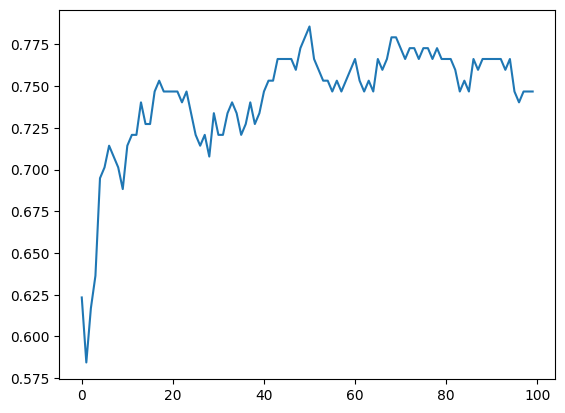

0.7857142857142857


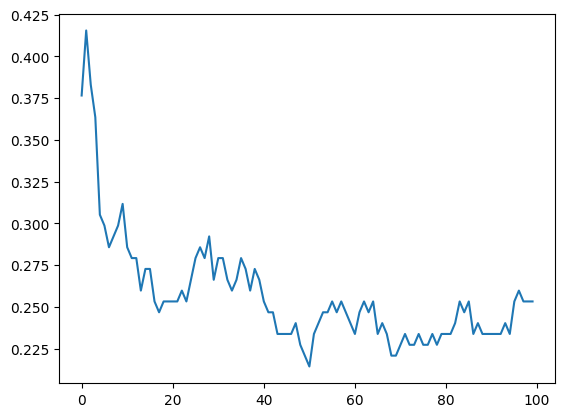

In [27]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
err=[]
for i in range(1,101):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred_test=knn.predict(x_test)
  score=knn.score(x_test,y_test)
  scores.append(score)
  err.append(np.mean((y_test!=y_pred_test)))
plt.plot(scores)
plt.show()
plt.plot(err)
print(max(scores))

In [28]:
#here seeing the two charts we can say that the point from where the accuracy has
# constantly increased and form where the error rate has constantly decreased is betwwne 50 to 60
# so try values from 50 to 60 and find the best value of k

In [29]:

knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       401
           1       0.77      0.56      0.65       213

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.75       614
weighted avg       0.79      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred_train_svm=svc.predict(x_train)
y_pred_test_svm=svc.predict(x_test)
print(classification_report(y_train,y_pred_train_svm))
print(classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       401
           1       0.81      0.68      0.74       213

    accuracy                           0.83       614
   macro avg       0.83      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [31]:
# now implementing the adance model with custom parameters
'''
-> The C argument is a regularization parameter that controls the trade-off between achieving a low training error and keeping the decision boundary as simple as possible.

  For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly, which may cause the model to overfit.
  Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points, but potentially better generalization to unseen data.

-> A kernel function, often denoted as K(x, y), takes two input vectors (data points) in the original low-dimensional space and returns a single real number representing their similarity in a higher-dimensional feature space,
  1.Linear kernel
  This is the simplest kernel, representing the standard dot product. It's used when the data is linearly separable
  2.Polynomial kernel
  This kernel maps the data into a higher-dimensional space to find a non-linear decision boundary. d is the degree of the polynomial
  3.rbf Radial Basis Function
  This is one of the most popular and generally effective kernels. It projects the data into an infinite-dimensional space. It essentially measures the similarity between two points based on their Euclidean distance.
  4.sigmoid
  This kernel is derived from the activation function of a two-layer neural network. It's less commonly used than RBF or polynomial kernels for general classification tasks but can be useful in specific scenarios

'''

"\n-> The C argument is a regularization parameter that controls the trade-off between achieving a low training error and keeping the decision boundary as simple as possible.\n\n  For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly, which may cause the model to overfit.\n  Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points, but potentially better generalization to unseen data.\n\n-> A kernel function, often denoted as K(x, y), takes two input vectors (data points) in the original low-dimensional space and returns a single real number representing their similarity in a higher-dimensional feature space,\n  1.Linear kernel\n  This is the simplest kernel, representing the standard dot product. It's used when the data is linearly separable\n  2.Polynomial kernel\

In [32]:
cs = [0.1, 0.5, 1, 5, 10]
kernels = ['linear','rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"Kernel: {kernel}")
    for c in cs:
        model = SVC(C=c, kernel=kernel)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        print("The value of C here is ",c)
        print(accuracy_score(y_test, preds))

Kernel: linear
The value of C here is  0.1
0.7532467532467533
The value of C here is  0.5
0.7402597402597403
The value of C here is  1
0.7402597402597403
The value of C here is  5
0.7402597402597403
The value of C here is  10
0.7402597402597403
Kernel: rbf
The value of C here is  0.1
0.7792207792207793
The value of C here is  0.5
0.7662337662337663
The value of C here is  1
0.7467532467532467
The value of C here is  5
0.7532467532467533
The value of C here is  10
0.7467532467532467
Kernel: poly
The value of C here is  0.1
0.7337662337662337
The value of C here is  0.5
0.7207792207792207
The value of C here is  1
0.7337662337662337
The value of C here is  5
0.6948051948051948
The value of C here is  10
0.6948051948051948
Kernel: sigmoid
The value of C here is  0.1
0.7532467532467533
The value of C here is  0.5
0.6948051948051948
The value of C here is  1
0.6558441558441559
The value of C here is  5
0.6038961038961039
The value of C here is  10
0.6298701298701299


In [33]:
#Here we can see that the linear kernel has performed well
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred_train_svm=svc.predict(x_train)
y_pred_test_svm=svc.predict(x_test)
print(classification_report(y_train,y_pred_train_svm))
print(classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.57      0.64       213

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.73       614
weighted avg       0.77      0.77      0.77       614

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.58      0.56      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



In [35]:
#now we will implemenet the advance leveled Decsision Tree Classifier model
'''
-> criterion:This parameter determines the function to measure the quality of a split
 1. 'gini' (Gini Impurity):
  Concept: Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.
  A Gini impurity of 0 means all elements belong to a single class (perfect purity), while a Gini impurity of 1 implies a random distribution of elements across different classes.

 2. 'entropy' (Information Gain):
  Concept: Entropy is a measure of the randomness or impurity in a set of data. In information theory, it quantifies the expected value of the information contained in a message.
  In the context of decision trees, a high entropy means high disorder or uncertainty (samples are mixed),
-> max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity
-> min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees
'''

"\n-> criterion:This parameter determines the function to measure the quality of a split\n 1. 'gini' (Gini Impurity):\n  Concept: Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.\n  A Gini impurity of 0 means all elements belong to a single class (perfect purity), while a Gini impurity of 1 implies a random distribution of elements across different classes.\n\n 2. 'entropy' (Information Gain):\n  Concept: Entropy is a measure of the randomness or impurity in a set of data. In information theory, it quantifies the expected value of the information contained in a message.\n  In the context of decision trees, a high entropy means high disorder or uncertainty (samples are mixed),\n-> max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity\n-> min_samples_leaf: The minimal number of sam

In [36]:
dd=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=43)
dd.fit(x_train,y_train)
y_pred_train=dd.predict(x_train)
y_pred_test=dd.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       401
           1       0.82      0.69      0.75       213

    accuracy                           0.84       614
   macro avg       0.83      0.80      0.81       614
weighted avg       0.84      0.84      0.83       614

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [37]:
#here trying differnet max depth and max_leaf_nodes and with the gini impurity we get the best accuracy

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [39]:
# now implementing the advance level random forest
'''
-> max_feature=This is a critical paraameter for Random Forests, as it introduces randomness and decorrelates the trees.
'auto' or 1.0 (default for scikit-learn versions < 1.0): Considers all features.
'sqrt' (default for scikit-learn versions >= 1.0): Considers sqrt(n_features) features (where n_features is the total number of features).
'log2': Considers log2(n_features) features.
-> n_estimators: This is perhaps one of the most important parameters. It specifies the number of trees in the forest
-> min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees
-> max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity

'''


"\n-> max_feature=This is a critical paraameter for Random Forests, as it introduces randomness and decorrelates the trees.\n'auto' or 1.0 (default for scikit-learn versions < 1.0): Considers all features.\n'sqrt' (default for scikit-learn versions >= 1.0): Considers sqrt(n_features) features (where n_features is the total number of features).\n'log2': Considers log2(n_features) features.\n-> n_estimators: This is perhaps one of the most important parameters. It specifies the number of trees in the forest\n-> min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees\n-> max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity\n\n"

In [40]:
for i in range(1,51):
  rf=RandomForestClassifier(n_estimators=i,max_depth=4,max_features='log2',min_samples_leaf=12)
  rf.fit(x_train,y_train)
  y_pred_train=rf.predict(x_train)
  y_pred_test=rf.predict(x_test)
  print(i, " ",accuracy_score(y_test,y_pred_test))

1   0.6818181818181818
2   0.6818181818181818
3   0.6818181818181818
4   0.7467532467532467
5   0.7467532467532467
6   0.7467532467532467
7   0.7662337662337663
8   0.7792207792207793
9   0.7597402597402597
10   0.7532467532467533
11   0.7662337662337663
12   0.7597402597402597
13   0.7532467532467533
14   0.7532467532467533
15   0.7402597402597403
16   0.7792207792207793
17   0.7532467532467533
18   0.7597402597402597
19   0.7662337662337663
20   0.7337662337662337
21   0.7532467532467533
22   0.7792207792207793
23   0.7662337662337663
24   0.7467532467532467
25   0.7662337662337663
26   0.7532467532467533
27   0.7727272727272727
28   0.7402597402597403
29   0.7402597402597403
30   0.7532467532467533
31   0.7467532467532467
32   0.7597402597402597
33   0.7792207792207793
34   0.7597402597402597
35   0.7727272727272727
36   0.7532467532467533
37   0.7662337662337663
38   0.7597402597402597
39   0.7597402597402597
40   0.7597402597402597
41   0.7662337662337663
42   0.7597402597402597
4

In [41]:
rf=RandomForestClassifier(n_estimators=11,max_features='log2',min_samples_leaf=12)
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       401
           1       0.81      0.68      0.74       213

    accuracy                           0.83       614
   macro avg       0.82      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [42]:
#this model is like the decision tree which performs like that gives that much accuracy.
#the purpose of this advance parameters is that it will make easy to implement the hyperparameter tunning using gridsearchcv

In [45]:
from sklearn.model_selection import GridSearchCV
params_grid={
    'n_estimators':[i for i in range(1,50,5)],
    'max_features':['sqrt','log2'],
    'max_depth':[i for i in range(1,50,5)],
    'min_samples_leaf':[i for i in range(1,50,5)],
}
gc=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_grid,cv=5,scoring='accuracy')
gc.fit(x_train,y_train)
y_pred_test=gc.predict(x_test)
y_pred_train=gc.predict(x_train)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))
print(gc.best_params_)
print(gc.best_score_)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       401
           1       0.99      0.99      0.99       213

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

{'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 26}
0.7948287351725976


In [46]:
#here now after hyper parameter tunning, will apply bagging and boosting methods
#and will improve EDA further by applying resampling and StratifiedShuffleSplit

In [47]:
#A Bagging classifier is an ensemble model that trains base classifiers on random subsets of the original dataset (Bootstrap Sampling by default), and then aggregate their individual predictions by voting. We import the module:
#Bagging improves models that suffer from overfitting; they do well on the training data, but they do not Generalize well. Decision Trees are a prime candidate for this reason, in addition, they are fast to train; We create a BaggingClassifier object, with a Decision Tree as the base_estimator
#The bootstrap=True parameter in BaggingClassifier means that each base estimator is trained on a random subset of the training data, drawn with replacement. This is known as bootstrap aggregating or bagging.
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=16,max_features='log2',max_depth=6),random_state=42,n_estimators=5,bootstrap=True)
bc.fit(x_train,y_train)
y_pred_train=bc.predict(x_train)
y_pred_test=bc.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       401
           1       0.90      0.72      0.80       213

    accuracy                           0.87       614
   macro avg       0.88      0.84      0.85       614
weighted avg       0.88      0.87      0.87       614

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



In [48]:
'''
parameters for the boosting
-> objective : Specify the learning task and the corresponding learning objective or a custom objective function to be used. For example:
  binary:logistic: binary classification
  multi:softprob:multi-class classification
->n_jobs : Number of parallel threads used to run xgboost.
  When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads.
  Creating thread contention will significantly slow down both algorithms.
->learning_rate: t determines the step size at each iteration while moving towards a minimum of the loss function.
'''

'\nparameters for the boosting \n-> objective : Specify the learning task and the corresponding learning objective or a custom objective function to be used. For example:\n  binary:logistic: binary classification\n  multi:softprob:multi-class classification\n->n_jobs : Number of parallel threads used to run xgboost. \n  When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads. \n  Creating thread contention will significantly slow down both algorithms. \n->learning_rate: t determines the step size at each iteration while moving towards a minimum of the loss function.\n'

In [49]:
from xgboost import XGBClassifier
model =XGBClassifier(objective='binary:logistic',learning_rate=0.1,n_estimators=10,eval_metric='mlogloss')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       401
           1       0.89      0.79      0.84       213

    accuracy                           0.89       614
   macro avg       0.89      0.87      0.88       614
weighted avg       0.89      0.89      0.89       614

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

